In [17]:
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
import datetime as dt
import numpy as np
import pandas as pd
import os
from matplotlib.pyplot import margins, xticks
from setuptools.command.rotate import rotate


In [18]:

dir_name="C:\\volume_dia\\"
dir= os.listdir(dir_name)

arr_files=[]
for i in dir:
    split=os.path.splitext(i)
    file_name=split[0]
    file_ext=split[1]
    if file_ext==".csv":
        full_name= file_name+file_ext
        arr_files.append(full_name)    
    
print(arr_files)    
    #arr_files[i]=i
#print("arr_files", arr_files)


['EURGBP_PERIOD_D1.csv', 'EURUSD_PERIOD_D1.csv', 'GBPUSD_PERIOD_D1.csv']


In [19]:
# 0 = EURGBP
# 1 = EURUSD
# 2 = GBPUSD
df =pd.read_csv(dir_name+arr_files[1], delimiter="\t", encoding="UTF-16")
print(df.head(3))
df_reset =df.reset_index()
print(df_reset)
#print(full_name)
date_time=df["Time"]
#df = pd.read_csv(file)

         Time     Open     High      Low    Close   Volume
0  2024.10.04  1.10348  1.10392  1.09509  1.09744  78127.0
1  2024.10.03  1.10455  1.10465  1.10078  1.10348  82399.0
2  2024.10.02  1.10642  1.10825  1.10322  1.10455  71919.0
     index        Time     Open     High      Low    Close   Volume
0        0  2024.10.04  1.10348  1.10392  1.09509  1.09744  78127.0
1        1  2024.10.03  1.10455  1.10465  1.10078  1.10348  82399.0
2        2  2024.10.02  1.10642  1.10825  1.10322  1.10455  71919.0
3        3  2024.10.01  1.11362  1.11437  1.10453  1.10642  94888.0
4        4  2024.09.30  1.11686  1.12086  1.11133  1.11362  84441.0
..     ...         ...      ...      ...      ...      ...      ...
375    375  2023.07.23  1.11186  1.11303  1.11134  1.11239   1477.0
376    376  2023.07.21  1.11341  1.11446  1.11075  1.11246  45803.0
377    377  2023.07.20  1.12046  1.12289  1.11181  1.11341  52596.0
378    378  2023.07.19  1.12279  1.12397  1.11740  1.12046  54782.0
379    379  2023

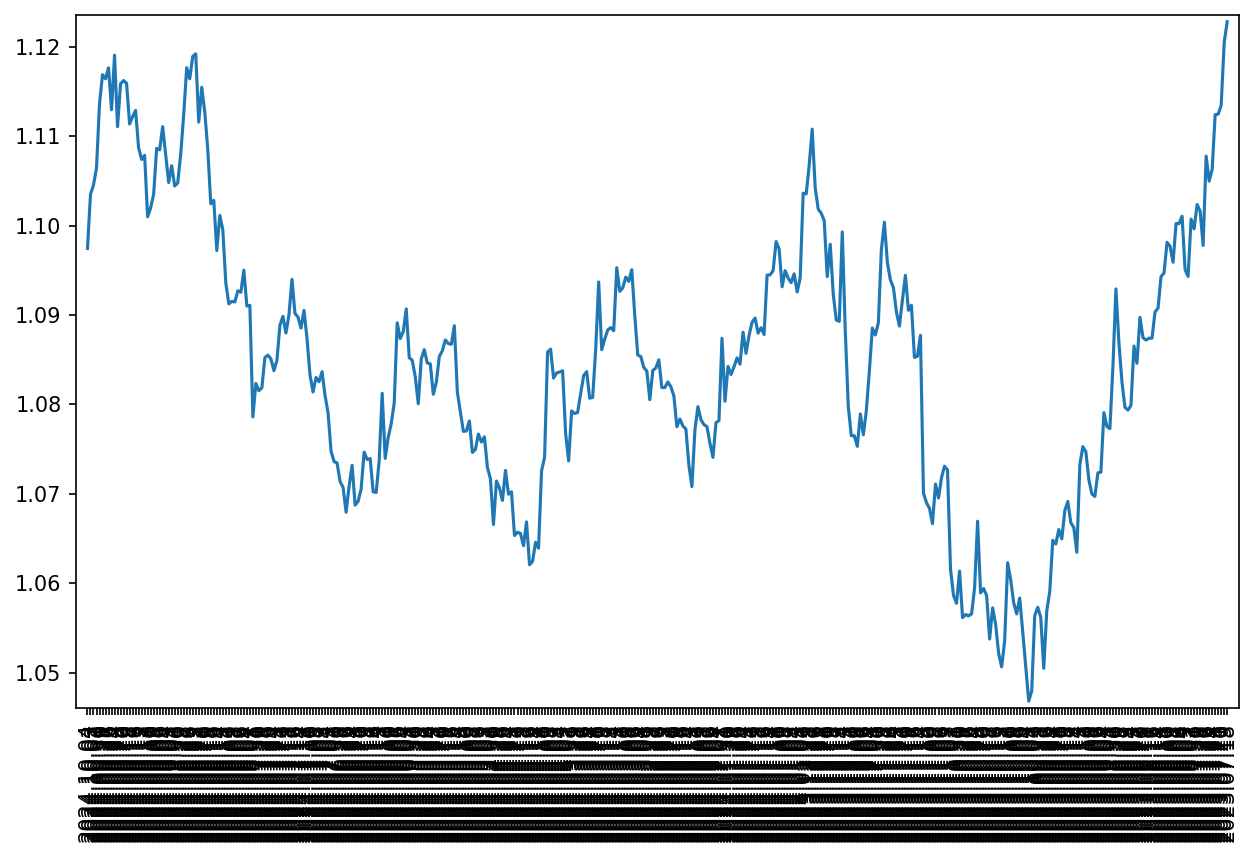

In [27]:
limit = 25000
axis_x = df["Time"]
axis_y = df["Close"]
plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
plt.margins(.01)
#plt.plot(axis_x, axis_y)


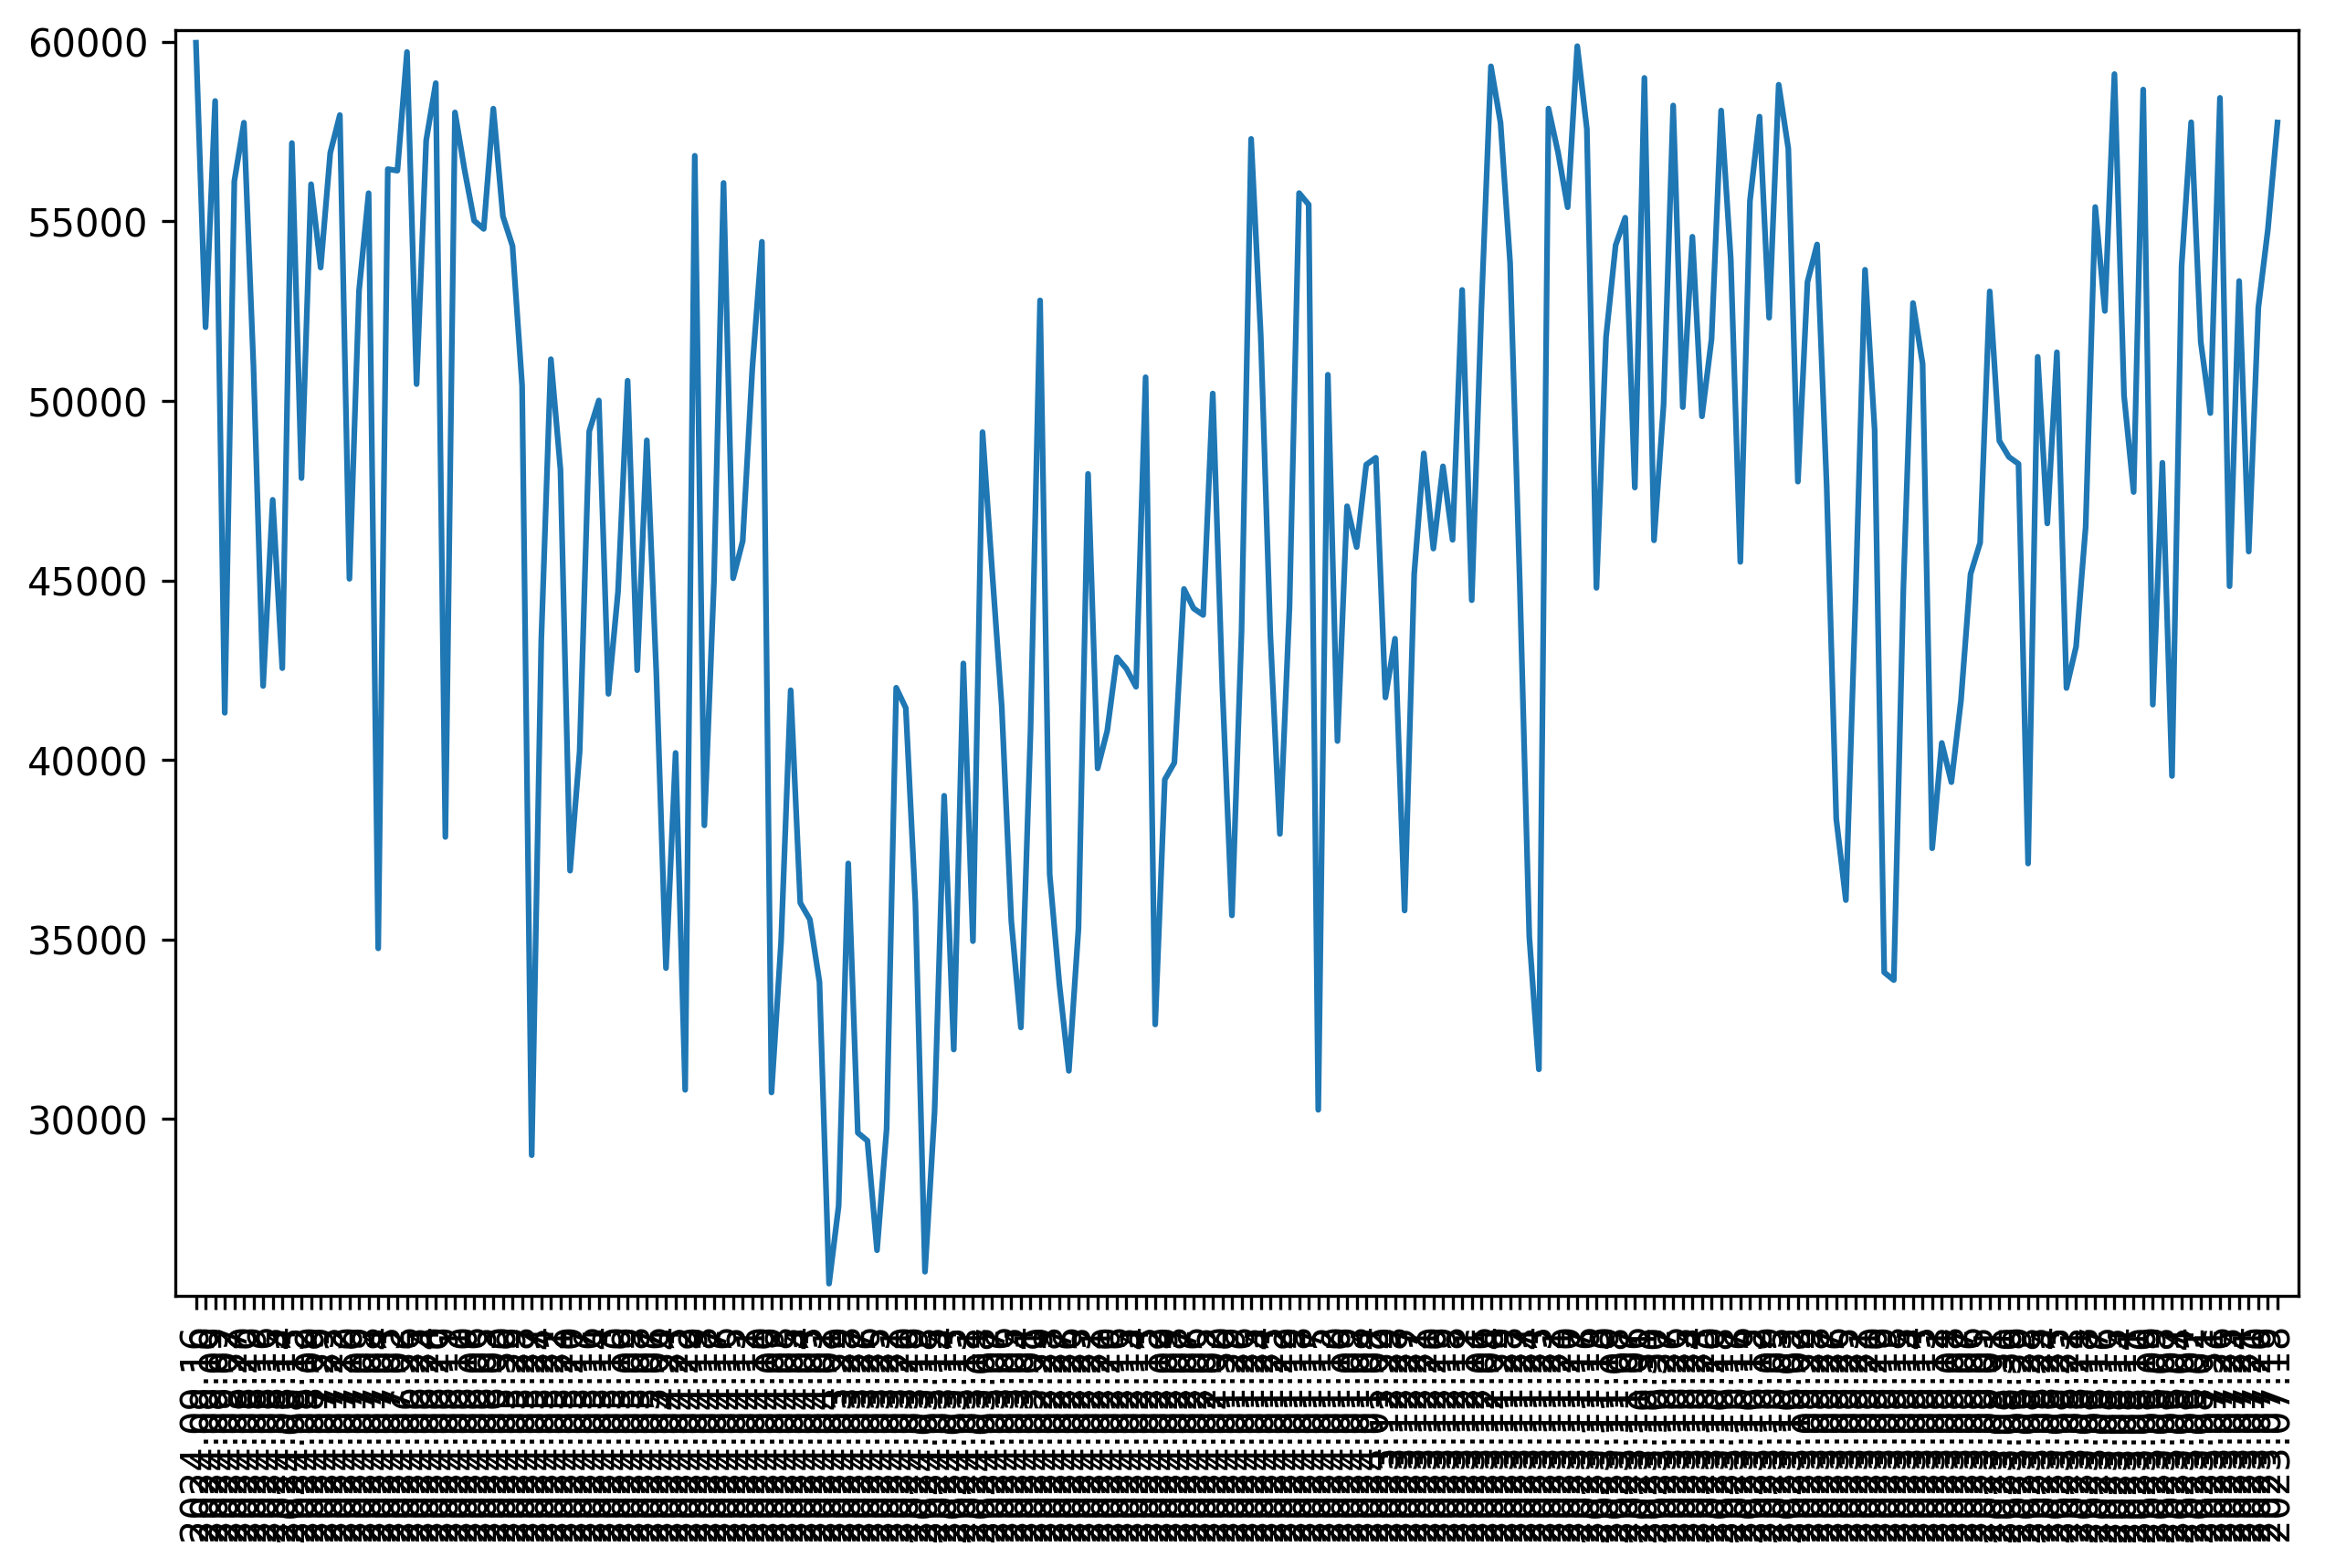

In [25]:
# torna dificil tracar qualquer tipo de relação do volume ao preço de fechamento, já que o volume tende variar dentro eixo por volta do 47k, com variação de 1 STD (removido outlier e baixo volume),passa a impressão que alteração no volume pode estar ralcionado ao mudança de proço, mas logo isso deixar de ser verdade quando há um queda no venda  EUR seguida uma venda do USD e volume não da sinal de tendencia, com asim preço de fecho

filter_high_volume= df[df["Volume"]>limit] 
outlier = (df[(df["Volume"]<60000) & (df["Volume"]>limit)])
plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
plt.margins(.01)
plt.plot(outlier["Time"],outlier["Volume"])
# outlier["Volume"].describe()

plt.show()


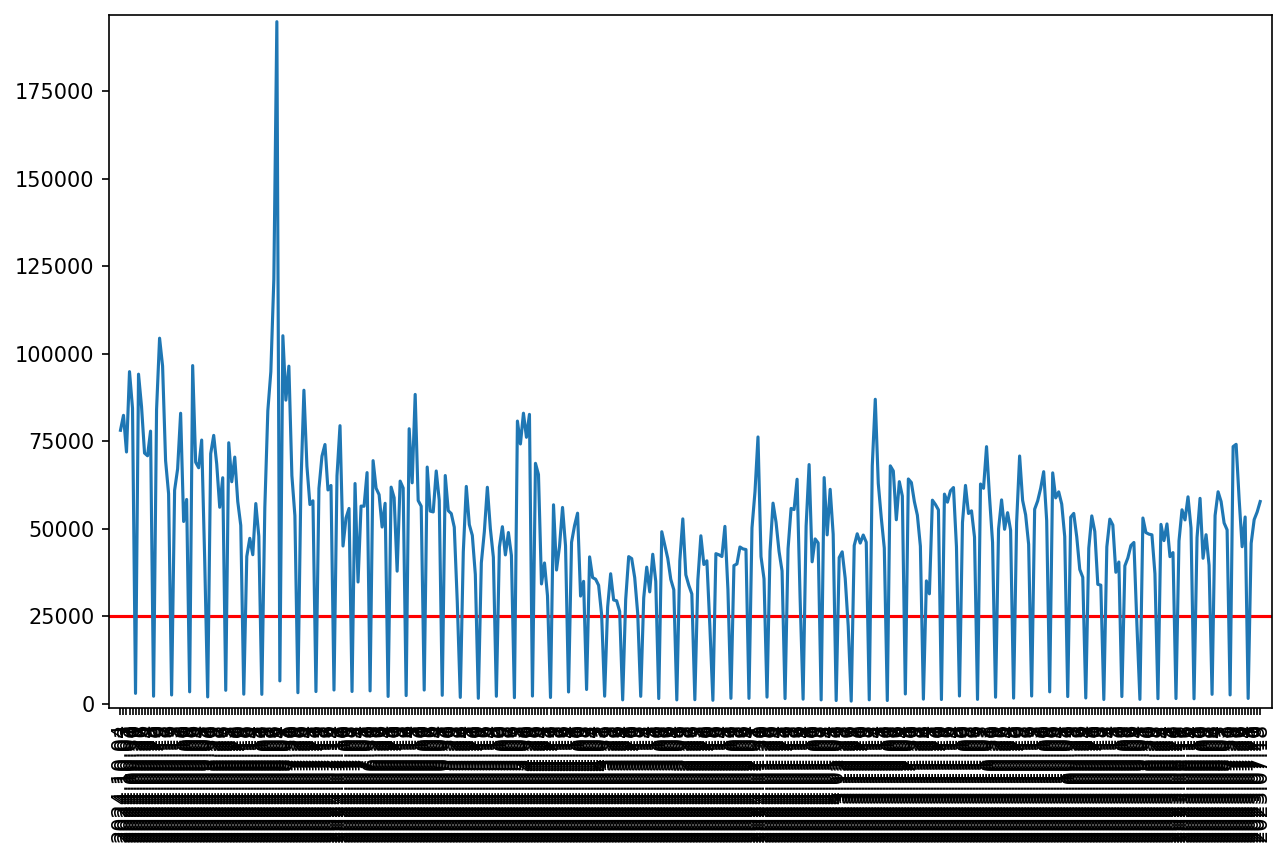

In [22]:
df_datetime = pd.to_datetime(date_time)
filter_year =df_datetime.dt.year>=2024
filter0= df_datetime.dt.month==3
plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)


# plt.plot(filter_low_volume["Time"],filter_low_volume["Volume"])
plt.axhline(y=limit, color="r", linestyle="-")
plt.plot(df["Time"],df["Volume"])
plt.margins(.01)

plt.show()


           Time     Open     High      Low    Close  Volume
5    2024.09.29  1.11547  1.11720  1.11542  1.11686  2925.0
11   2024.09.22  1.11600  1.11649  1.11573  1.11586  2109.0
17   2024.09.15  1.10768  1.10891  1.10739  1.10870  2462.0
23   2024.09.08  1.10771  1.10905  1.10770  1.10863  3365.0
29   2024.09.01  1.10455  1.10492  1.10437  1.10442  1910.0
..          ...      ...      ...      ...      ...     ...
351  2023.08.20  1.08626  1.08783  1.08626  1.08746  1440.0
357  2023.08.13  1.09479  1.09517  1.09398  1.09428  1375.0
363  2023.08.06  1.10101  1.10149  1.10007  1.10022  2648.0
369  2023.07.30  1.10100  1.10280  1.10100  1.10235  2477.0
375  2023.07.23  1.11186  1.11303  1.11134  1.11239  1477.0

[66 rows x 6 columns]


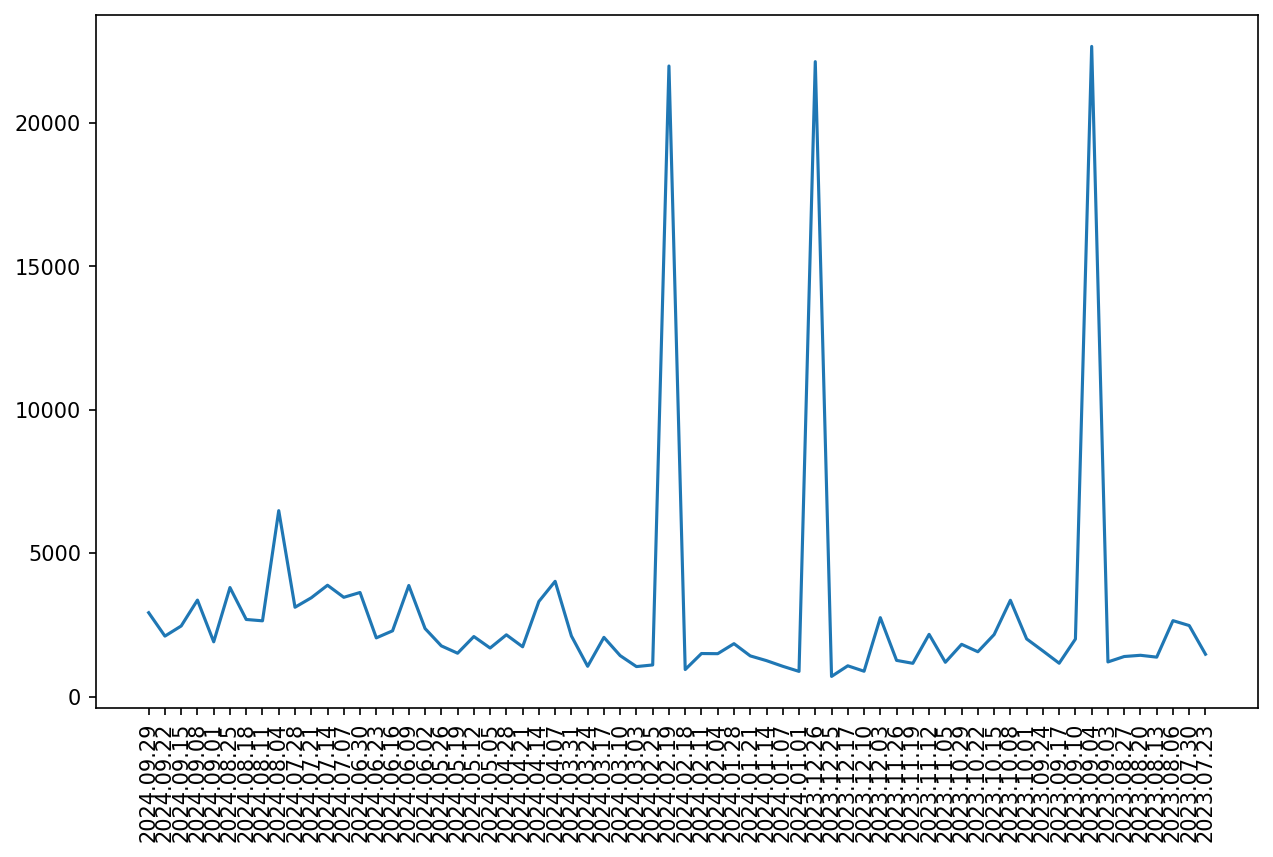

In [23]:
# baixo ocorrer maioritariamente  ao domingo devido, bolsa americana e europeia estar fechada e abertura da bolsa asiatica

filter_low_volume= df[df["Volume"]<limit]
print (filter_low_volume)
plt.figure(figsize=(10,6), dpi=150)
plt.xticks(rotation=90)
plt.plot(filter_low_volume["Time"],filter_low_volume["Volume"])
# plt.margins(.01)
# plt.show()